In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Tabular%20Playground%20Series%20-%20Jan%202022/train.csv', index_col='row_id')
test = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Tabular%20Playground%20Series%20-%20Jan%202022/test.csv', index_col='row_id')
sample_sub = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Tabular%20Playground%20Series%20-%20Jan%202022/sample_submission.csv', index_col='row_id')
color_c = px.colors.sequential.Teal
color_d = px.colors.qualitative.Set2
for df in train, test:
    df['date'] = pd.to_datetime(df['date'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26298 entries, 0 to 26297
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      26298 non-null  datetime64[ns]
 1   country   26298 non-null  object        
 2   store     26298 non-null  object        
 3   product   26298 non-null  object        
 4   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ MB


In [3]:
train.describe()

,num_sold
count,26298.000000
mean,387.533577
std,266.076193
min,70.000000
25%,190.000000
50%,315.000000
75%,510.000000
max,2884.000000


In [4]:
fig = px.histogram(train, x='country', color='country', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=700, template='plotly_white', title='Count of country')

In [5]:
fig = px.histogram(train, x='store', color='store', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=700, template='plotly_white', title='Count of store')

In [6]:
fig = px.histogram(train, x='product', color='product', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=700, template='plotly_white', title='Count of product')

In [7]:
fig = px.histogram(data_frame=train, x='country', y='num_sold', color='product', barmode='group', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=700, template='plotly_white', title='Number of products sold by country')

In [8]:
temp = train.groupby(['country', 'product'])['num_sold'].sum()
temp = temp.groupby(level=0).apply(lambda x: np.round(x/x.sum()*100)).reset_index()
temp.rename(columns={'num_sold': '% of total sales'})

,country,product,% of total sales
0,Finland,Kaggle Hat,54.0
1,Finland,Kaggle Mug,31.0
2,Finland,Kaggle Sticker,15.0
3,Norway,Kaggle Hat,54.0
4,Norway,Kaggle Mug,30.0
5,Norway,Kaggle Sticker,15.0
6,Sweden,Kaggle Hat,54.0
7,Sweden,Kaggle Mug,30.0
8,Sweden,Kaggle Sticker,15.0


In [9]:
temp = train.groupby(['date', 'country'])['num_sold'].sum().reset_index()
fig = fig = px.line(data_frame=temp, x='date', y='num_sold', color='country', color_discrete_sequence=color_d)
fig.update_layout(height=500, width=1000, template='plotly_white', title='Daily sales by country')

In [10]:
pivot = train.pivot_table(index='date', values='num_sold', columns='country', aggfunc='sum')

fig = px.imshow(pivot.corr(), color_continuous_scale=color_c)
fig.update_layout(height=400, width=700, template='plotly_white')

In [11]:
fig = px.histogram(data_frame=train, x='store', y='num_sold', color='product', barmode='group', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=700, template='plotly_white', title='Products sold by store')

In [12]:
temp = train.groupby(['store', 'product'])['num_sold'].sum()
temp = temp.groupby(level=0).apply(lambda x: np.round(x/x.sum()*100)).reset_index()
temp.rename(columns={'num_sold': '% of total sales'})

,store,product,% of total sales
0,KaggleMart,Kaggle Hat,54.0
1,KaggleMart,Kaggle Mug,30.0
2,KaggleMart,Kaggle Sticker,15.0
3,KaggleRama,Kaggle Hat,54.0
4,KaggleRama,Kaggle Mug,30.0
5,KaggleRama,Kaggle Sticker,15.0


In [13]:
temp = train.groupby(['date', 'store'])['num_sold'].sum().reset_index()

fig = px.line(data_frame=temp, x='date', y='num_sold', color='store', color_discrete_sequence=color_d)
fig.update_layout(height=500, width=1000, template='plotly_white', title='Daily sales by store')

In [14]:
pivot = train.pivot_table(index='date', values='num_sold', columns='store', aggfunc='sum')

fig = px.imshow(pivot.corr(), color_continuous_scale=color_c)
fig.update_layout(height=400, width=700, template='plotly_white')

In [15]:
temp = train.groupby(['date', 'product'])['num_sold'].sum().reset_index()

fig = px.line(data_frame=temp, x='date', y='num_sold', color='product', color_discrete_sequence=color_d)
fig.update_layout(height=500, width=1000, template='plotly_white', title='Daily sales by product')

In [16]:
pivot = train.pivot_table(index='date', values='num_sold', columns='product', aggfunc='sum')

fig = px.imshow(pivot.corr(), color_continuous_scale=color_c)
fig.update_layout(height=400, width=700, template='plotly_white')

In [17]:
temp = train.groupby(['date', 'product'])['num_sold'].sum()
temp = temp.groupby(level=0).apply(lambda x: np.round(x/x.sum()*100)).reset_index()

fig = px.line(data_frame=temp, x='date', y='num_sold', color='product', color_discrete_sequence=color_d)
fig.update_layout(height=500, width=1000, template='plotly_white', title='Daily relative proportion of products sold')

In [18]:
hat = temp[temp['product'] == 'Kaggle Hat']
hat.name = 'Hat'

mug = temp[temp['product'] == 'Kaggle Mug']
mug.name = 'Mug'

sticker = temp[temp['product'] == 'Kaggle Sticker']
sticker.name = 'Sticker'
for df in hat, mug, sticker:
    
    adf = adfuller(df['num_sold'], autolag='AIC')
    
    if adf[1] < 0.05:
        print(f'p-value is below 0.05 at {np.round(adf[1], 4)} so we reject the null hypothesis: {df.name} data is stationary')
    else:
        print(f'p-value is above 0.05 at {np.round(adf[1], 4)} so we fail to reject the null hypothesis: {df.name} data is not stationary')

p-value is below 0.05 at 0.0012 so we reject the null hypothesis: Hat data is stationary
p-value is below 0.05 at 0.0073 so we reject the null hypothesis: Mug data is stationary
p-value is above 0.05 at 0.4866 so we fail to reject the null hypothesis: Sticker data is not stationary


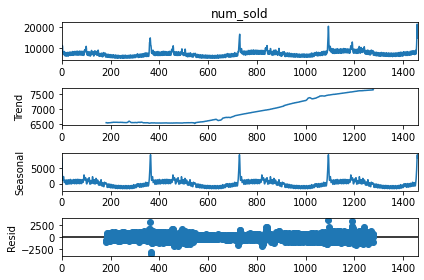

In [19]:
temp = train.groupby('date')['num_sold'].sum().reset_index()
sd = seasonal_decompose(temp['num_sold'], model='additive', period=365)
sd.plot();

In [20]:
temp['30d MA'] = temp['num_sold'].rolling(window=30).mean()
temp['90d MA'] = temp['num_sold'].rolling(window=90).mean()
fig = px.line(temp, x='date', y='90d MA', title='Daily sales', color_discrete_sequence=color_d)
fig.update_layout(height=400, width=1000, template='plotly_white', title='90 days moving average')